<a href="https://colab.research.google.com/github/anthonymurphysr/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
# Set observations as N
n = 7

# Calculate mean
mean = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7

# Calculate Step 1 & Step 2 of Variance
sub_mean = [3505-mean, 2400-mean, 3027-mean, 2798-mean, 3700-mean, 3250-mean, 2689-mean]
squares = [x*x for x in sub_mean]
# Sum of Square to Calculate STD
sos = (204562.36734693873 + 426035.9387755103 + 661.2244897959217 + 
      64879.36734693881 + 418978.7959183673 + 38921.65306122446 + 132288.0816326531)

# Calculate true variance after SOS is discovered
variance = sos/(n-1)

# Calculate Standard Deviation
std = variance**(1/2)

# Print results
print('The mean is:', mean)
print('The variance is:', variance)
print('The STD is: ', std)

The mean is: 3052.714285714286
The variance is: 214387.90476190473
The STD is:  463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create Sales DF
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales = pd.DataFrame(sales)

# Create customers DF
customers = [127, 80, 105, 92, 120, 115, 93]
customers = pd.DataFrame(customers)

# Create Sales vs Customers
svc = pd.concat([sales, customers], axis=1)
svc.columns = ["Sales", "Customers"]

# Covariance for Sales vs Customers
svc.cov()

,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381




## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
# Assign variables for std
std_cust = svc.Customers.std(ddof=0)
std_sales = svc.Sales.std(ddof=0)

# Print variables
print('The standard deviation of customers is: ', std_cust)
print('The standard deviation of sales is: ', std_sales)

The standard deviation of customers is:  15.792015549069118
The standard deviation of sales is:  428.67360686714756


In [4]:
# Standardize COV with STD
standardize = (svc.cov())/(std_cust * std_sales)

# Print standardize
print(standardize)

               Sales  Customers
Sales      31.669118   1.123306
Customers   1.123306   0.042979


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [5]:
# Import Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

# Inspect head
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [6]:
# Drop unnecessary columns
df = df.drop(['name', 'sex', 'cabin', 'embarked', 'home.dest', 'ticket', 'boat'], axis=1)

In [7]:
# Assign Variance and Covariance 
cov = df.cov
cor = df.corr

# Print var/cor tables
print('Variance-Covariance\n',cov)
print('\nCorrelation\n',cor)

Variance-Covariance
 <bound method DataFrame.cov of       Unnamed: 0  pclass  survived  ...      fare   body  has_cabin_number
0              1     1.0       1.0  ...  211.3375    NaN                 1
1              2     1.0       1.0  ...  151.5500    NaN                 1
2              3     1.0       0.0  ...  151.5500    NaN                 1
3              4     1.0       0.0  ...  151.5500  135.0                 1
4              5     1.0       0.0  ...  151.5500    NaN                 1
...          ...     ...       ...  ...       ...    ...               ...
1305        1306     3.0       0.0  ...   14.4542    NaN                 0
1306        1307     3.0       0.0  ...    7.2250  304.0                 0
1307        1308     3.0       0.0  ...    7.2250    NaN                 0
1308        1309     3.0       0.0  ...    7.8750    NaN                 0
1309        1310     NaN       NaN  ...       NaN    NaN                 0

[1310 rows x 9 columns]>

Correlation
 <bound m

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


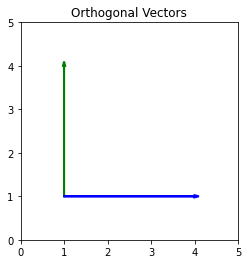

In [8]:
# Set plot limits
plt.xlim(0,5)         
plt.ylim(0,5)

# Set vectors
x = [0,3]
y = [3,0]

# Set chart to equal side square
plt.axes().set_aspect('equal')

# Plot vectors
plt.arrow(1, 1, *x, linewidth=2, head_width=.05, head_length=0.1, color ='g')
plt.arrow(1, 1, *y, linewidth=2, head_width=.05, head_length=0.1, color ='b')

# Set title
plt.title("Orthogonal Vectors")

# Plot
plt.show()

---
A synonym for orthogonal is perpendicular.

---



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [9]:
# Import LA
import numpy.linalg as LA

# Set vectors to variables
a = pd.DataFrame([[-5], [3], [7]])
b = pd.DataFrame([[6], [-8], [2]])

# Calculate Norm
norm_a = LA.norm(a)
norm_b = LA.norm(b)

# Calculate Unit Vector
unit_a = a/norm_a
unit_b = b/norm_b

# Print Unit Vector
print('Unit Vector A:\n',unit_a)
print('\nUnit Vector B:\n', unit_b)
print('The a*b is: ', a*b)
print('\nThe dot product is', str(-30-24+14), 'so therefore the vectors are not orthogonal.')

Unit Vector A:
           0
0 -0.548821
1  0.329293
2  0.768350

Unit Vector B:
           0
0  0.588348
1 -0.784465
2  0.196116
The a*b is:      0
0 -30
1 -24
2  14

The dot product is -40 so therefore the vectors are not orthogonal.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [10]:
# Create c 
c = pd.DataFrame([2, -15, 6, 20])

# ||c||**2
c2 = (LA.norm(c))**2
# c*c
cc = c*c
#cTc
ctc = (c.T)*c

# Print values
print('The ||c||^2 is: ', c2)
print('\nThe c*c is: ', cc)
print('\nThe dot product is: 665\n')
print('The cTc is: ', ctc)

The ||c||^2 is:  665.0

The c*c is:       0
0    4
1  225
2   36
3  400

The dot product is: 665

The cTc is:       0   1   2   3
0  4.0 NaN NaN NaN
1  NaN NaN NaN NaN
2  NaN NaN NaN NaN
3  NaN NaN NaN NaN


---
They all add up to the same sum.

---

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

---
$$ \begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align} $$

---
$$ \begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align} $$

---


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [11]:
# Create F
f = pd.DataFrame([4, 12, 11, 92])

# Print Magnitude of F
print('Magnitude:\n ', LA.norm(f))

# Calculate Unit Vector of F
unit_f = f/(LA.norm(f))

# Print Unit Vector of F
print('F Unit Vector:\n',unit_f)

Magnitude:
  93.5147047260483
F Unit Vector:
           0
0  0.042774
1  0.128322
2  0.117629
3  0.983802


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

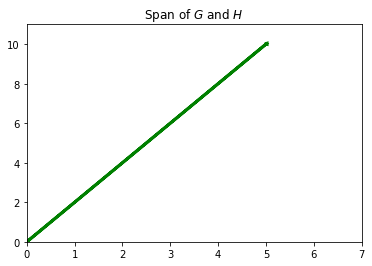

The span vector is:
    [ 5 10]


In [26]:
g = np.array([1,2]) 
h = np.array([4,8])

# Linear Combination
span = g + h 

# Axis Bounds
plt.xlim(0,7)          
plt.ylim(0,11)

# Plot Span
plt.arrow(0,0, *span, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Span of $G$ and $H$")
plt.show()

# Print span vector
print('The span vector is:\n   ', span)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

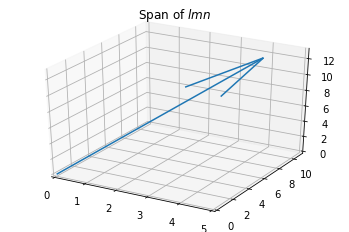

The span vector is:
    [ 4 10 12]


In [25]:
# Import Axes3D from mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

# Create vectors
l = np.array([0, 0, 0, 1, 2, 3])
m = np.array([0, 0, 0, -1, 0, 7])
n = np.array([0, 0, 0, 4, 8, 2])
span = l + m + n

# Zip Vector
X, Y, Z, U, V, W = zip(span)

# Set fig
fig = plt.figure()

# Set ax to 3D Projection
ax = fig.add_subplot(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)

#Set x-limit
ax.set_xlim([0, 5])
# Set y-limit
ax.set_ylim([0, 11])
# Set z-limit
ax.set_zlim([0, 13])
# Set title and squash output with ;
plt.title('Span of $l$$m$$n$');


# Plot vector
plt.show()

# Print span vector
print('The span vector is:\n   ', span[3:])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

To form a basis is to find the set of vectors that are linearly independent and that spans the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

*Start*
$$P= \begin{bmatrix} 1 & 2  & 3\\ -1 & 0 & 7 \\ 4 & 8 & 2\end{bmatrix}$$

---
*R2 + (1*R1) 
$$P= \begin{bmatrix} 1 & 2  & 3\\ 0 & 2 & 10 \\ 0 & 0 & -10\end{bmatrix}$$

---
*R2 / 2*
$$P= \begin{bmatrix} 1 & 2  & 3\\ 0 & 1 & 5 \\ 0 & 0 & -10\end{bmatrix}$$

---
*R3 / -10*
$$P= \begin{bmatrix} 1 & 2  & 3\\ 0 & 1 & 5 \\ 0 & 0 & 1\end{bmatrix}$$

---
This matrix has a rank of 3.

## 7.2 What does the rank of a matrix tell us?

---
It helps determine what vectors may be linearly independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

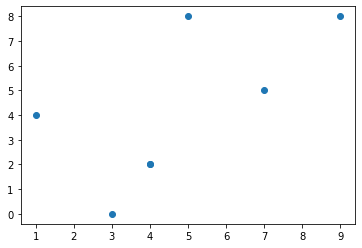

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()